In [1]:
import pandas as pd
import numpy as np
import joblib
import streamlit
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Задание 1

In [9]:
# Генерация случайного набора данных
np.random.seed(0)
n_samples = np.random.randint(100, 201)

##### Вариант 1

In [43]:
X = np.random.randint(-100, 100, size=(n_samples, 2))
y = np.array([0 if np.linalg.norm(x) > 50 else 1 for x in X])

##### Вариант 2

In [45]:
X = np.random.randint(-100, 100, size=(n_samples, 2))
y = np.array([0 if x[0] * x[1] > 0 else 1 for x in X])

##### Вариант 3

In [92]:
xParab = np.linspace(0, 20, 70)  
yParab = (xParab - 10)**2 - 70

xParab1 = np.linspace(-10, 10, 70)
yParab1 = xParab1**2*-1 + 70

X1 = np.column_stack((xParab1, yParab1))
X2 = np.column_stack((xParab, yParab))

X = np.concatenate((X1, X2), axis=0)
zeros = np.zeros(70)
ones = np.ones(70)
y = np.concatenate((zeros, ones))

#### Далее

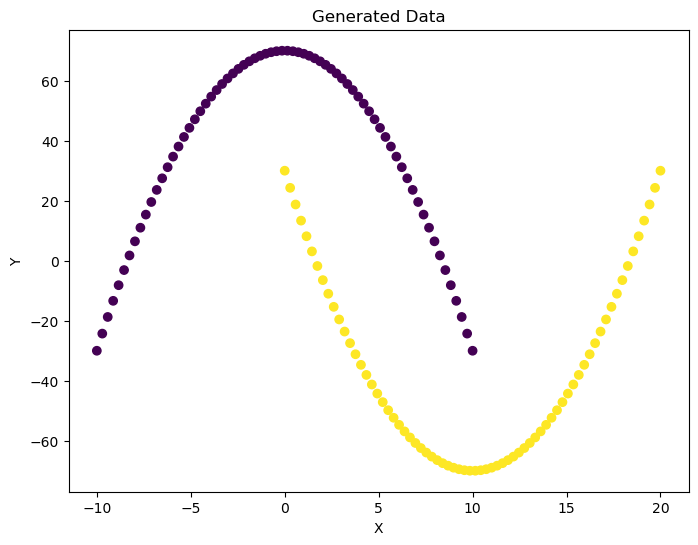

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data')
plt.show()

In [94]:
# Разделение на train и test выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
# Обучение и тестирование модели KNN с разными значениями k
k_values = range(1, 9)
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

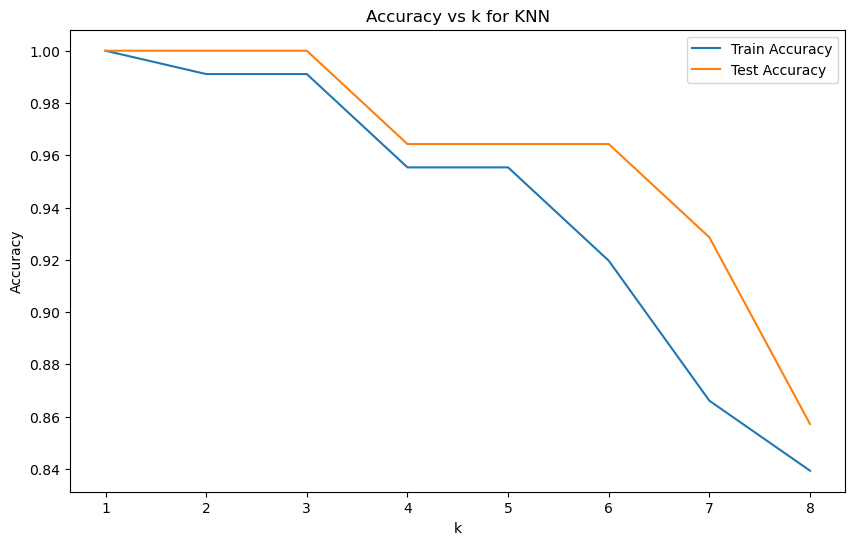

In [96]:
# Построение графиков точности классификации
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Train Accuracy')
plt.plot(k_values, test_accuracy, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')
plt.legend()
plt.show()

In [97]:
# Вычисление точности, полноты, F1-меры и построение матрицы расхождений
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[14  0]
 [ 0 14]]


# Задание 2

In [149]:
C="Cat"
F="Fish"
H="Hen"
# истинныезначения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
y_true = np.expand_dims(y_true, -1)
# результатсистемы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]
y_pred = np.expand_dims(y_pred, -1)

In [165]:
# поиск всех нужных значений 
cat = y_pred[:6]
noCat = np.count_nonzero(cat != C)
yesCat = 6 - noCat
recallCat = round(yesCat / 6, 3)
precisionCat = round(yesCat / np.count_nonzero(y_pred == C), 3)
supportCat = np.count_nonzero(y_true == C)
f1Cat = round(2/(1/precisionCat + 1/recallCat), 3)

In [166]:
fish = y_pred[6:16]
noFish = np.count_nonzero(fish != F)
yesFish = 10 - noFish
recallFish = round(yesFish / 10, 3)
precisionFish = round(yesFish / np.count_nonzero(y_pred == F), 3)
supportFish = np.count_nonzero(y_true == F)
f1Fish = round(2/(1/precisionFish + 1/recallFish), 3)

In [167]:
hen = y_pred[16:]
noHen = np.count_nonzero(hen != H)
yesHen = 9 - noHen
recallHen = round(yesHen / 9, 3)
precisionHen = round(yesHen / np.count_nonzero(y_pred == H), 3)
supportHen = np.count_nonzero(y_true == H)
f1Hen = round(2/(1/precisionHen + 1/recallHen), 3)

In [168]:
support = 25
accuracy = (yesCat + yesFish + yesHen) / support
accuracy

0.48

In [169]:
macroPrecision = round((precisionCat + precisionFish + precisionHen) / 3, 3)
macroRecall = round((recallCat + recallFish + recallHen) / 3, 3)
macroF1 = round((f1Cat + f1Fish + f1Hen) / 3, 3)

weightedPrecision = round((precisionCat*supportCat + precisionFish*supportFish + precisionHen*supportHen) / support, 3)
weightedRecall = round((recallCat*supportCat + recallFish*supportFish + recallHen*supportHen) / support, 3)
weightedF1 = round((f1Cat*supportCat + f1Fish*supportFish + f1Hen*supportHen) / support,3 )

In [189]:
print("      precision recall f1-score support")
print("Cat   ", precisionCat, "   ", recallCat, "   ", f1Cat, "   ", supportCat)
print("Fish  ", precisionFish, "   ", recallFish, "   ", f1Fish, "   ", supportFish)
print("Hen   ", precisionHen, "   ", recallHen, "   ", f1Hen, "   ", supportHen)
print(" ")
print("accuracy                   ", accuracy, "   ", support)
print("macro avg    ", macroPrecision, " ", macroRecall, " ", macroF1, " ", support)
print("weighted avg ", weightedPrecision, " ", weightedRecall, " ", weightedF1, " ", support)

      precision recall f1-score support
Cat    0.308     0.667     0.421     6
Fish   0.667     0.2     0.308     10
Hen    0.667     0.667     0.667     9
 
accuracy                    0.48     25
macro avg     0.547   0.511   0.465   25
weighted avg  0.581   0.48   0.464   25


# Задание 3

In [2]:
# загружаем датасет про диабет 
data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(2768, 10)

In [4]:
# выбираем 3 переменные для прогнозирования целевой 
firstValue = 'Glucose'
secondValue = 'Insulin'
thridValue = 'DiabetesPedigreeFunction'
outputValue = 'Outcome'

In [5]:
data = data[[firstValue, secondValue, thridValue, outputValue]]
data

,Glucose,Insulin,DiabetesPedigreeFunction,Outcome
0,148,0,0.627,1
1,85,0,0.351,0
2,183,0,0.672,1
3,89,94,0.167,0
4,137,168,2.288,1
...,...,...,...,...
2763,75,55,0.370,0
2764,179,130,0.719,1
2765,85,0,0.382,0
2766,129,130,0.319,1


In [18]:
# делим на тренировочный и тестовый набор 
x_train = data[:2100]
y_train = x_train[[outputValue]]
x_train = x_train[[firstValue, secondValue, thridValue]]
x_train

,Glucose,Insulin,DiabetesPedigreeFunction
0,148,0,0.627
1,85,0,0.351
2,183,0,0.672
3,89,94,0.167
4,137,168,2.288
...,...,...,...
2095,111,78,0.495
2096,102,0,0.180
2097,134,130,0.542
2098,87,0,0.773


In [19]:
x_test = data[2100:]
y_test = x_test[[outputValue]]
x_test = x_test[[firstValue, secondValue, thridValue]]
x_test

,Glucose,Insulin,DiabetesPedigreeFunction
2100,75,55,0.370
2101,179,130,0.719
2102,85,0,0.382
2103,129,130,0.319
2104,143,0,0.190
...,...,...,...
2763,75,55,0.370
2764,179,130,0.719
2765,85,0,0.382
2766,129,130,0.319


In [20]:
y_test

,Outcome
2100,0
2101,1
2102,0
2103,1
2104,0
...,...
2763,0
2764,1
2765,0
2766,1


In [21]:
x_train

,Glucose,Insulin,DiabetesPedigreeFunction
0,148,0,0.627
1,85,0,0.351
2,183,0,0.672
3,89,94,0.167
4,137,168,2.288
...,...,...,...
2095,111,78,0.495
2096,102,0,0.180
2097,134,130,0.542
2098,87,0,0.773


In [22]:
# Создаем и обучаем модели линейной регрессии для каждой переменной
model_Glucose = LinearRegression()
model_Glucose.fit(x_train[['Glucose']], y_train)

LinearRegression()

In [23]:
model_Insulin = LinearRegression()
model_Insulin.fit(x_train[['Insulin']], y_train)

LinearRegression()

In [24]:
model_DiabetesPedigreeFunction = LinearRegression()
model_DiabetesPedigreeFunction.fit(x_train[['DiabetesPedigreeFunction']], y_train)

LinearRegression()

In [29]:
# Оцениваем точность моделей на тренировочном и тестовом наборах
r2_train_Glucose = r2_score(y_train, model_Glucose.predict(x_train[['Glucose']]))
r2_train_Insulin = r2_score(y_train, model_Insulin.predict(x_train[['Insulin']]))
r2_train_DiabetesPedigreeFunction = r2_score(y_train, model_DiabetesPedigreeFunction.predict(x_train[['DiabetesPedigreeFunction']]))

r2_test_Glucose = r2_score(y_test, model_Glucose.predict(x_test[['Glucose']]))
r2_test_Insulin = r2_score(y_test, model_Insulin.predict(x_test[['Insulin']]))
r2_test_DiabetesPedigreeFunction = r2_score(y_test, model_DiabetesPedigreeFunction.predict(x_test[['DiabetesPedigreeFunction']]))

In [32]:
# Выводим R2 для тренировочной выборки 
print(f'R2 (тренировочный набор данных) - Glucose: {r2_train_Glucose}')
print(f'R2 (тренировочный набор данных) - Insulin: {r2_train_Insulin}')
print(f'R2 (тренировочный набор данных) - DiabetesPedigreeFunction: {r2_train_DiabetesPedigreeFunction}')

R2 (тренировочный набор данных) - Glucose: 0.21397750080051536
R2 (тренировочный набор данных) - Insulin: 0.015042840841829053
R2 (тренировочный набор данных) - DiabetesPedigreeFunction: 0.02665186726856461


In [33]:
# Выводим R2 для тестовой выборки 
print(f'R2 (тренировочный набор данных) - Glucose: {r2_test_Glucose}')
print(f'R2 (тренировочный набор данных) - Insulin: {r2_test_Insulin}')
print(f'R2 (тренировочный набор данных) - DiabetesPedigreeFunction: {r2_test_DiabetesPedigreeFunction}')

R2 (тренировочный набор данных) - Glucose: 0.206489566306432
R2 (тренировочный набор данных) - Insulin: 0.016036356698519105
R2 (тренировочный набор данных) - DiabetesPedigreeFunction: 0.02314328074351213
